In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
response=requests.get("https://www.sofascore.com/football/match/bournemouth-crystal-palace/hkb#id:14025237,tab:statistics")

In [3]:
response.status_code

200

In [4]:
soup=BeautifulSoup(response.text,"html.parser")

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
response.status_code

200

In [7]:
response.status_code

200

In [8]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9,hi;q=0.8',
    'referer': 'https://www.sofascore.com/football/match/inter-bodoglimt/gnsXdb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/145.0.0.0 Safari/537.36',
}

url='https://www.sofascore.com/api/v1/event/15452744/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [9]:
shots=response.json()

In [10]:
df1=pd.json_normalize(shots["shotmap"])

In [11]:
df1

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,timeSeconds,...,draw.start.y,draw.block.x,draw.block.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,player.sofascoreId,goalkeeper.sofascoreId,goalType
0,False,block,regular,right-foot,low-centre,0.083619,0.000000,6738267,85,5087,...,8.0,42.6,6.8,49.0,0,49.0,81.0,NaN,NaN,NaN
1,False,miss,assisted,left-foot,high,0.047872,0.000000,6738261,82,4884,...,19.9,NaN,NaN,48.2,0,48.2,5.6,zielu_94,NaN,NaN
2,True,save,fast-break,left-foot,low-right,0.038849,0.067886,6738259,81,4839,...,12.3,46.4,1.8,52.4,0,52.4,94.3,NaN,yannsommer,NaN
3,False,miss,assisted,right-foot,high,0.116406,0.000000,6738244,72,4309,...,13.8,NaN,NaN,49.7,0,49.7,29.2,m_thuram,NaN,NaN
4,True,goal,assisted,left-foot,low-right,0.282061,0.970287,6738230,64,3819,...,5.7,NaN,NaN,54.0,0,54.0,96.8,NaN,yannsommer,regular
5,True,goal,assisted,left-foot,high-left,0.186793,0.586999,6738221,61,3640,...,11.0,NaN,NaN,46.9,0,46.9,69.6,NaN,yannsommer,regular
6,True,block,corner,right-foot,low-centre,0.038339,0.000000,6738143,50,2995,...,13.6,48.4,7.3,51.2,0,51.2,81.0,NaN,yannsommer,NaN
7,True,save,assisted,left-foot,high-right,0.040701,0.354483,6738141,49,2925,...,9.9,44.8,2.2,52.6,0,52.6,68.4,NaN,yannsommer,NaN
8,False,save,set-piece,left-foot,low-centre,0.015301,0.012943,6738140,48,2874,...,25.9,50.2,0.5,50.9,0,50.9,97.5,NaN,NaN,NaN
9,False,post,assisted,right-foot,right,0.261563,0.000000,6738138,46,2745,...,10.1,NaN,NaN,55.1,0,55.1,88.6,LautaroM,NaN,NaN


In [12]:
df1.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'timeSeconds', 'reversedPeriodTime',
       'reversedPeriodTimeSeconds', 'periodTimeSeconds', 'incidentType',
       'player.name', 'player.firstName', 'player.lastName', 'player.slug',
       'player.shortName', 'player.position', 'player.jerseyNumber',
       'player.userCount', 'player.gender', 'player.id',
       'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.hi',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'blockCoordinates.x', 'blockCoordinates.y',
       'blockCoordinates.z'

In [13]:
df1=df1[["isHome","shotType","xg","time","player.shortName","player.jerseyNumber","playerCoordinates.x","playerCoordinates.y",
        "goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [14]:
df1

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,block,0.083619,85,C. Augusto,30,8.0,41.5,0,51.0
1,False,miss,0.047872,82,P. Zieliński,7,19.9,41.4,0,51.8
2,True,save,0.038849,81,A. Helmersen,21,12.3,27.1,0,47.6
3,False,miss,0.116406,72,M. Thuram,9,13.8,40.1,0,50.3
4,True,goal,0.282061,64,K. Høgh,9,5.7,52.3,0,46.0
5,True,goal,0.186793,61,J. P. Hauge,10,11.0,36.4,0,53.1
6,True,block,0.038339,50,J. P. Hauge,10,13.6,46.0,0,48.8
7,True,save,0.040701,49,K. Høgh,9,9.9,30.1,0,47.4
8,False,save,0.015301,48,C. Augusto,30,25.9,61.7,0,49.1
9,False,post,0.261563,46,L. Martínez,10,10.1,55.2,0,44.9


In [15]:
df1["playerCoordinates.x"]=df1["playerCoordinates.x"]*1.2
df1["playerCoordinates.y"]=df1["playerCoordinates.y"]*0.8
df1["goalMouthCoordinates.x"]=df1["goalMouthCoordinates.x"]*1.2
df1["goalMouthCoordinates.y"]=df1["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\3066603430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["playerCoordinates.x"]=df1["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\3066603430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["playerCoordinates.y"]=df1["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\3066603430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [16]:
df1

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,block,0.083619,85,C. Augusto,30,9.60,33.20,0.0,40.80
1,False,miss,0.047872,82,P. Zieliński,7,23.88,33.12,0.0,41.44
2,True,save,0.038849,81,A. Helmersen,21,14.76,21.68,0.0,38.08
3,False,miss,0.116406,72,M. Thuram,9,16.56,32.08,0.0,40.24
4,True,goal,0.282061,64,K. Høgh,9,6.84,41.84,0.0,36.80
5,True,goal,0.186793,61,J. P. Hauge,10,13.20,29.12,0.0,42.48
6,True,block,0.038339,50,J. P. Hauge,10,16.32,36.80,0.0,39.04
7,True,save,0.040701,49,K. Høgh,9,11.88,24.08,0.0,37.92
8,False,save,0.015301,48,C. Augusto,30,31.08,49.36,0.0,39.28
9,False,post,0.261563,46,L. Martínez,10,12.12,44.16,0.0,35.92


In [17]:
for x in range(len(df1["playerCoordinates.x"])):
    if (df1["isHome"][x]==False):
        df1["playerCoordinates.y"][x]=80 - df1["playerCoordinates.y"][x]
    if (df1["isHome"][x]==True):
        df1["playerCoordinates.y"][x]=80 - df1["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\3691851212.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["playerCoordinates.y"][x]=80 - df1["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_160

In [18]:
df1

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,block,0.083619,85,C. Augusto,30,9.60,46.80,0.0,40.80
1,False,miss,0.047872,82,P. Zieliński,7,23.88,46.88,0.0,41.44
2,True,save,0.038849,81,A. Helmersen,21,14.76,58.32,0.0,38.08
3,False,miss,0.116406,72,M. Thuram,9,16.56,47.92,0.0,40.24
4,True,goal,0.282061,64,K. Høgh,9,6.84,38.16,0.0,36.80
5,True,goal,0.186793,61,J. P. Hauge,10,13.20,50.88,0.0,42.48
6,True,block,0.038339,50,J. P. Hauge,10,16.32,43.20,0.0,39.04
7,True,save,0.040701,49,K. Høgh,9,11.88,55.92,0.0,37.92
8,False,save,0.015301,48,C. Augusto,30,31.08,30.64,0.0,39.28
9,False,post,0.261563,46,L. Martínez,10,12.12,35.84,0.0,35.92


In [19]:
#Shotmap

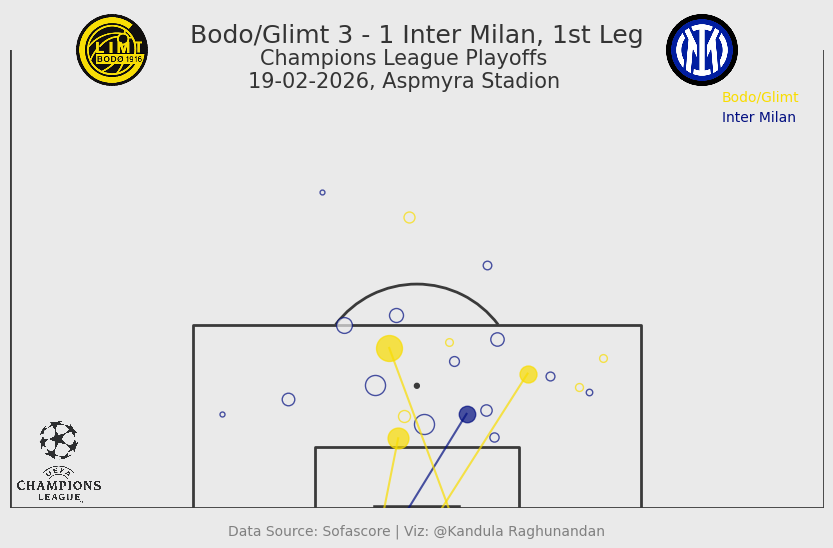

In [20]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#EAEAEA', line_color='#3A3A3A',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Bodoe Glimt.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Inter.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/UCL Logo1.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df1["playerCoordinates.x"])):
    if (df1["isHome"][x]==True):
        if df1["shotType"][x]=="save":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if ((df1["shotType"][x]=="miss") | (df1["shotType"][x]=="post")):
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if df1["shotType"][x]=="block":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if df1["shotType"][x]=="goal":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#F9DD00",s=df1["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
            plt.plot((df1["playerCoordinates.y"][x],df1["goalMouthCoordinates.y"][x]),(df1["playerCoordinates.x"][x],df1["goalMouthCoordinates.x"][x]),color="#F9DD00",alpha=0.7)
    if (df1["isHome"][x]==False):
        if df1["shotType"][x]=="save":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if ((df1["shotType"][x]=="miss") | (df1["shotType"][x]=="post")):
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if df1["shotType"][x]=="block":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#EAEAEA",s=df1["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if df1["shotType"][x]=="goal":
            plt.scatter(y=df1["playerCoordinates.x"][x],x=df1["playerCoordinates.y"][x],color="#010E80",s=df1["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
            plt.plot((df1["playerCoordinates.y"][x],df1["goalMouthCoordinates.y"][x]),(df1["playerCoordinates.x"][x],df1["goalMouthCoordinates.x"][x]),color="#010E80",alpha=0.7)

plt.title("Bodo/Glimt 3 - 1 Inter Milan, 1st Leg",color="#343434",size=18, y=1)
plt.suptitle("Champions League Playoffs\n19-02-2026, Aspmyra Stadion", fontsize=15, color="#343434", y=0.825)

ax.text(70,40,"Bodo/Glimt",c="#F9DD00")
ax.text(70,38,"Inter Milan",c="#010E80")

add_logo(ax, home_logo, zoom=0.2, xy=(0.125, 1))
add_logo(ax, away_logo, zoom=0.2, xy=(0.85, 1))
add_logo(ax,league_logo,zoom=0.03, xy=(0.06,0.1))

plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/bodo_vs_inter_1_2026.png")

In [21]:
#xG Flowchart

In [22]:
df1=df1.sort_values("time").reset_index()
df1

,index,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,22,False,block,0.050733,5,L. Martínez,10,12.96,53.12,0.0,40.48
1,21,False,miss,0.126771,6,H. Mkhitaryan,22,18.96,37.92,0.0,41.44
2,20,True,miss,0.093064,9,O. L. Bjørtuft,4,9.00,38.72,0.0,32.24
3,19,True,goal,0.434720,20,S. Fet,19,15.72,37.28,0.0,43.12
4,18,False,post,0.102124,26,M. Darmian,36,10.68,27.36,0.0,35.52
5,17,False,save,0.161716,28,N. Barella,23,18.00,32.88,0.0,38.96
6,15,False,goal,0.175391,30,F. P. Esposito,94,9.24,44.88,0.0,39.20
7,16,False,block,0.054803,30,C. Augusto,30,6.96,47.60,0.0,41.60
8,14,True,save,0.078329,37,P. Berg,7,28.56,39.20,0.0,40.80
9,13,False,save,0.016144,37,M. Darmian,36,9.24,20.80,0.0,37.76


In [23]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df1["playerCoordinates.x"])):
    if (df1["isHome"][x]==True):
        h_xG.append(df1["xg"][x])
        h_min.append(df1["time"][x])
    if (df1["isHome"][x]==False):
        a_xG.append(df1["xg"][x])
        a_min.append(df1["time"][x])

In [24]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [25]:
h_cum

[0,
 np.float64(0.093064427375793),
 np.float64(0.527784466743473),
 np.float64(0.606113411486153),
 np.float64(0.646814510226254),
 np.float64(0.6851537600159691),
 np.float64(0.871946550905709),
 np.float64(1.154007084667689),
 np.float64(1.1928561404347482)]

In [26]:
a_cum

[0,
 np.float64(0.05073269456625),
 np.float64(0.17750418931245998),
 np.float64(0.27962828427553),
 np.float64(0.4413445815444),
 np.float64(0.6167352870106699),
 np.float64(0.6715387478470809),
 np.float64(0.6876822803169499),
 np.float64(0.7150248400866999),
 np.float64(0.9752339534461498),
 np.float64(1.0379099510610108),
 np.float64(1.299473073333501),
 np.float64(1.314773779362439),
 np.float64(1.431179333478209),
 np.float64(1.4790510050952401),
 np.float64(1.5626701153814762)]

In [27]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

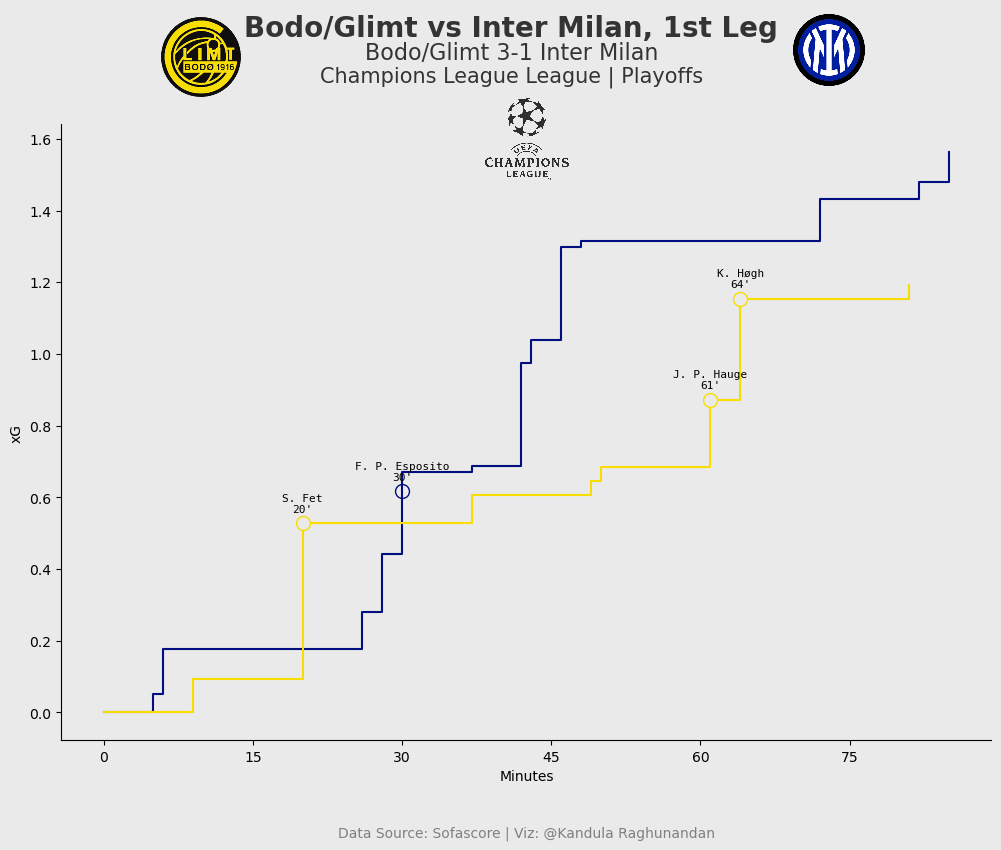

In [28]:
fig,ax=plt.subplots(figsize=(12,8))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df1['cumulative_xG'] = df1.groupby('isHome')['xg'].cumsum()

ax.step(x=a_min,y=a_cum,where="post",color="#010E80")
ax.step(x=h_min,y=h_cum,where="post",color="#F9DD00")

for x in range(len(df1["playerCoordinates.x"])):
    if (df1["isHome"][x]==True):
        if df1["shotType"][x]=="goal":
            plt.scatter(y=df1["cumulative_xG"][x],x=df1["time"][x],color="#EAEAEA",s=100,edgecolors="#F9DD00",zorder=5)
            ax.text(
                df1['time'][x],
                df1['cumulative_xG'][x] + 0.07,
                df1['player.shortName'][x],
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
            ax.text(
                df1['time'][x],
                df1['cumulative_xG'][x] + 0.04,
                str(df1['time'][x])+"'",
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
    if (df1["isHome"][x]==False):
        if df1["shotType"][x]=="goal":
            plt.scatter(y=df1["cumulative_xG"][x],x=df1["time"][x],color="#EAEAEA",s=100,edgecolors="#010E80")
            ax.text(
                df1['time'][x],
                df1['cumulative_xG'][x] + 0.07,
                df1['player.shortName'][x],
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
            ax.text(
                df1['time'][x],
                df1['cumulative_xG'][x] + 0.04,
                str(df1['time'][x])+"'",
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )

fig.text(0.5, 1, "Bodo/Glimt vs Inter Milan, 1st Leg", fontsize=20, fontweight='bold', color='#343434', ha="center", va="center")
fig.text(0.5, 0.97, "Bodo/Glimt 3-1 Inter Milan", fontsize=16, color='#343434', ha="center", va="center")
fig.text(0.5, 0.94, "Champions League League | Playoffs", fontsize=15, color='#343434', ha="center", va="center" )

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Bodoe Glimt.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Inter.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/UCL Logo1.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.225, xy=(0.15, 1.11))
add_logo(ax, away_logo, zoom=0.2, xy=(0.825, 1.12))
add_logo(ax, league_logo, zoom=0.03, xy=(.5, 0.975))

plt.text(
    0.5, -0.15, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

fig.savefig("C:/Users/K Raghunandan/Analyst/Results/Bodo_vs_inter_2026_xG.png", bbox_inches='tight')

In [29]:
response=requests.get("https://www.sofascore.com/football/match/bournemouth-crystal-palace/hkb#id:14025237,tab:statistics")

In [30]:
response.status_code

200

In [31]:
soup=BeautifulSoup(response.text,"html.parser")

In [32]:
soup.select('g[cursor="pointer"]')

[]

In [33]:
response.status_code

200

In [34]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9,hi;q=0.8',
    'referer': 'https://www.sofascore.com/football/match/inter-bodoglimt/gnsXdb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/145.0.0.0 Safari/537.36',
}

url='https://www.sofascore.com/api/v1/event/15452764/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [35]:
shots=response.json()

In [36]:
df2=pd.json_normalize(shots["shotmap"])

In [37]:
df2

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,addedTime,...,draw.goal.x,draw.goal.y,goalkeeper.sofascoreId,player.sofascoreId,goalType,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y
0,True,miss,assisted,right-foot,left,0.035119,0.000000,6778881,90,2.0,...,40.0,86.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,miss,set-piece,left-foot,high,0.007458,0.000000,6778872,86,NaN,...,45.0,13.9,yannsommer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,miss,assisted,head,high-right,0.053791,0.000000,6778870,84,NaN,...,60.8,34.7,NaN,m_thuram,NaN,NaN,NaN,NaN,NaN,NaN
3,True,miss,corner,head,high-left,0.046141,0.000000,6778856,81,NaN,...,39.5,56.9,NaN,m_thuram,NaN,NaN,NaN,NaN,NaN,NaN
4,True,goal,corner,right-foot,low-centre,0.318085,0.185204,6778818,76,NaN,...,49.7,81.0,NaN,alessandrobastoni,regular,NaN,NaN,NaN,NaN,NaN
5,True,miss,corner,head,left,0.077340,0.000000,6778868,76,NaN,...,36.1,79.2,NaN,m_thuram,NaN,1.5,45.8,0.0,45.8,1.5
6,True,block,assisted,right-foot,low-centre,0.091616,0.000000,6778804,75,NaN,...,48.5,81.0,NaN,NaN,NaN,8.1,48.2,0.0,48.2,8.1
7,False,goal,fast-break,right-foot,low-left,0.528628,0.827718,6778792,72,NaN,...,46.8,91.1,yannsommer,NaN,regular,NaN,NaN,NaN,NaN,NaN
8,True,miss,assisted,left-foot,high,0.080057,0.000000,6778772,70,NaN,...,47.9,12.5,NaN,dimarco32,NaN,NaN,NaN,NaN,NaN,NaN
9,True,miss,corner,right-foot,close-left,0.558804,0.000000,6778740,69,NaN,...,41.3,91.7,NaN,m_thuram,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df2.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'addedTime', 'timeSeconds',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'periodTimeSeconds',
       'incidentType', 'player.name', 'player.firstName', 'player.lastName',
       'player.slug', 'player.shortName', 'player.position',
       'player.jerseyNumber', 'player.userCount', 'player.gender', 'player.id',
       'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.hi',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'goalkeeper.name', 'goalkeeper.firstName',
       'goalkee

In [39]:
df2=df2[["isHome","shotType","xg","time","player.shortName","player.jerseyNumber","playerCoordinates.x","playerCoordinates.y",
        "goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [40]:
df2

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,miss,0.035119,90,A. Bonny,14,8.6,29.4,0,60.0
1,False,miss,0.007458,86,S. Fet,19,22.2,34.2,0,55.0
2,True,miss,0.053791,84,M. Thuram,9,8.6,55.5,0,39.2
3,True,miss,0.046141,81,M. Thuram,9,9.1,46.3,0,60.5
4,True,goal,0.318085,76,A. Bastoni,95,3.3,53.4,0,50.3
5,True,miss,0.077340,76,M. Thuram,9,6.9,54.5,0,63.9
6,True,block,0.091616,75,P. Sučić,8,10.5,48.1,0,51.5
7,False,goal,0.528628,72,H. Evjen,26,10.0,55.9,0,53.2
8,True,miss,0.080057,70,F. Dimarco,32,8.5,32.7,0,52.1
9,True,miss,0.558804,69,M. Thuram,9,4.0,48.7,0,58.7


In [41]:
df2["playerCoordinates.x"]=df2["playerCoordinates.x"]*1.2
df2["playerCoordinates.y"]=df2["playerCoordinates.y"]*0.8
df2["goalMouthCoordinates.x"]=df2["goalMouthCoordinates.x"]*1.2
df2["goalMouthCoordinates.y"]=df2["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\1335197100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["playerCoordinates.x"]=df2["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\1335197100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["playerCoordinates.y"]=df2["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\1335197100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [42]:
df2

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,miss,0.035119,90,A. Bonny,14,10.32,23.52,0.0,48.00
1,False,miss,0.007458,86,S. Fet,19,26.64,27.36,0.0,44.00
2,True,miss,0.053791,84,M. Thuram,9,10.32,44.40,0.0,31.36
3,True,miss,0.046141,81,M. Thuram,9,10.92,37.04,0.0,48.40
4,True,goal,0.318085,76,A. Bastoni,95,3.96,42.72,0.0,40.24
5,True,miss,0.077340,76,M. Thuram,9,8.28,43.60,0.0,51.12
6,True,block,0.091616,75,P. Sučić,8,12.60,38.48,0.0,41.20
7,False,goal,0.528628,72,H. Evjen,26,12.00,44.72,0.0,42.56
8,True,miss,0.080057,70,F. Dimarco,32,10.20,26.16,0.0,41.68
9,True,miss,0.558804,69,M. Thuram,9,4.80,38.96,0.0,46.96


In [43]:
for x in range(len(df2["playerCoordinates.x"])):
    if (df2["isHome"][x]==False):
        df2["playerCoordinates.y"][x]=80 - df2["playerCoordinates.y"][x]
    if (df2["isHome"][x]==True):
        df2["playerCoordinates.y"][x]=80 - df2["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_16028\1681588171.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["playerCoordinates.y"][x]=80 - df2["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_160

In [44]:
df2

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,miss,0.035119,90,A. Bonny,14,10.32,56.48,0.0,48.00
1,False,miss,0.007458,86,S. Fet,19,26.64,52.64,0.0,44.00
2,True,miss,0.053791,84,M. Thuram,9,10.32,35.60,0.0,31.36
3,True,miss,0.046141,81,M. Thuram,9,10.92,42.96,0.0,48.40
4,True,goal,0.318085,76,A. Bastoni,95,3.96,37.28,0.0,40.24
5,True,miss,0.077340,76,M. Thuram,9,8.28,36.40,0.0,51.12
6,True,block,0.091616,75,P. Sučić,8,12.60,41.52,0.0,41.20
7,False,goal,0.528628,72,H. Evjen,26,12.00,35.28,0.0,42.56
8,True,miss,0.080057,70,F. Dimarco,32,10.20,53.84,0.0,41.68
9,True,miss,0.558804,69,M. Thuram,9,4.80,41.04,0.0,46.96


In [45]:
#Shotmap

In [46]:
df2

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,miss,0.035119,90,A. Bonny,14,10.32,56.48,0.0,48.00
1,False,miss,0.007458,86,S. Fet,19,26.64,52.64,0.0,44.00
2,True,miss,0.053791,84,M. Thuram,9,10.32,35.60,0.0,31.36
3,True,miss,0.046141,81,M. Thuram,9,10.92,42.96,0.0,48.40
4,True,goal,0.318085,76,A. Bastoni,95,3.96,37.28,0.0,40.24
5,True,miss,0.077340,76,M. Thuram,9,8.28,36.40,0.0,51.12
6,True,block,0.091616,75,P. Sučić,8,12.60,41.52,0.0,41.20
7,False,goal,0.528628,72,H. Evjen,26,12.00,35.28,0.0,42.56
8,True,miss,0.080057,70,F. Dimarco,32,10.20,53.84,0.0,41.68
9,True,miss,0.558804,69,M. Thuram,9,4.80,41.04,0.0,46.96


7
16


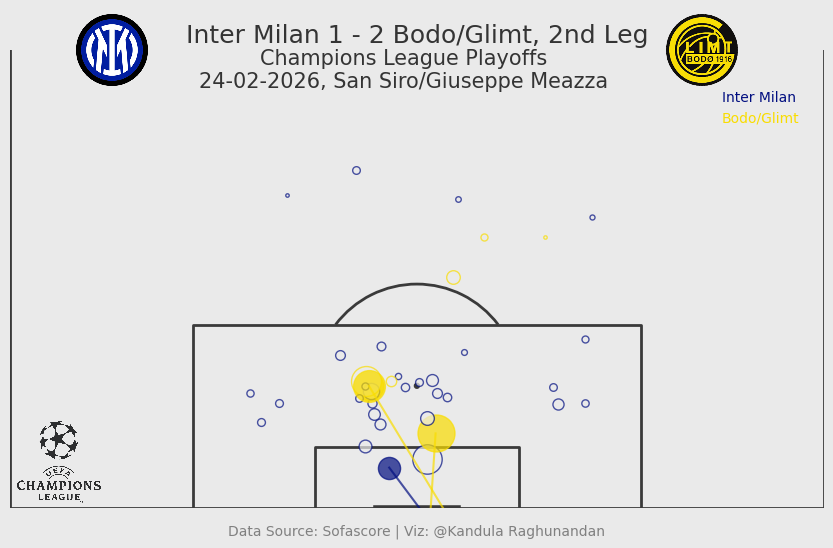

In [47]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#EAEAEA', line_color='#3A3A3A',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Inter.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Bodoe Glimt.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/UCL Logo1.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df2["playerCoordinates.x"])):
    if (df2["isHome"][x]==True):
        if df2["shotType"][x]=="save":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if ((df2["shotType"][x]=="miss") | (df2["shotType"][x]=="post")):
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if df2["shotType"][x]=="block":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
        if df2["shotType"][x]=="goal":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#010E80",s=df2["xg"][x]*800,edgecolors="#010E80",alpha=0.7)
            plt.plot((df2["playerCoordinates.y"][x],df2["goalMouthCoordinates.y"][x]),(df2["playerCoordinates.x"][x],df2["goalMouthCoordinates.x"][x]),color="#010E80",alpha=0.7)
    if (df2["isHome"][x]==False):
        if df2["shotType"][x]=="save":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if ((df2["shotType"][x]=="miss") | (df2["shotType"][x]=="post")):
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if df2["shotType"][x]=="block":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#EAEAEA",s=df2["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
        if df2["shotType"][x]=="goal":
            plt.scatter(y=df2["playerCoordinates.x"][x],x=df2["playerCoordinates.y"][x],color="#F9DD00",s=df2["xg"][x]*800,edgecolors="#F9DD00",alpha=0.7)
            plt.plot((df2["playerCoordinates.y"][x],df2["goalMouthCoordinates.y"][x]),(df2["playerCoordinates.x"][x],df2["goalMouthCoordinates.x"][x]),color="#F9DD00",alpha=0.7)
            print(x)

plt.scatter(y=df2["playerCoordinates.x"][7],x=df2["playerCoordinates.y"][7],color="#F9DD00",s=df2["xg"][7]*800+100,edgecolors="#F9DD00",alpha=0.7)

plt.title("Inter Milan 1 - 2 Bodo/Glimt, 2nd Leg",color="#343434",size=18, y=1)
plt.suptitle("Champions League Playoffs\n24-02-2026, San Siro/Giuseppe Meazza", fontsize=15, color="#343434", y=0.825)

ax.text(70,38,"Bodo/Glimt",c="#F9DD00")
ax.text(70,40,"Inter Milan",c="#010E80")

add_logo(ax, home_logo, zoom=0.2, xy=(0.125, 1))
add_logo(ax, away_logo, zoom=0.2, xy=(0.85, 1))
add_logo(ax,league_logo,zoom=0.03, xy=(0.06,0.1))

plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/bodo_vs_inter_2_2026.png")

In [48]:
#xG Flowchart

In [49]:
df2=df2.sort_values("time").reset_index()
df2

,index,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,36,True,miss,0.062524,3,F. P. Esposito,94,11.28,42.00,0.0,40.08
1,35,True,save,0.021914,9,F. P. Esposito,94,15.36,44.64,0.0,36.88
2,33,True,save,0.087369,12,D. Frattesi,16,9.24,35.76,0.0,42.56
3,34,True,save,0.033782,12,F. Dimarco,32,11.28,23.60,0.0,39.76
4,32,True,block,0.031575,15,M. Thuram,9,16.56,56.56,0.0,41.20
5,31,True,miss,0.121148,24,A. Bastoni,95,8.88,41.04,0.0,41.28
6,30,True,save,0.105337,28,D. Frattesi,16,6.12,34.88,0.0,37.84
7,29,True,miss,0.032629,30,F. P. Esposito,94,12.00,34.88,0.0,39.92
8,28,True,block,0.039760,31,F. P. Esposito,94,8.40,24.72,0.0,38.88
9,27,True,miss,0.016314,33,P. Zieliński,7,28.56,57.20,0.0,32.80


In [50]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df2["playerCoordinates.x"])):
    if (df2["isHome"][x]==True):
        h_xG.append(df2["xg"][x])
        h_min.append(df2["time"][x])
    if (df2["isHome"][x]==False):
        a_xG.append(df2["xg"][x])
        a_min.append(df2["time"][x])

In [51]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [52]:
a_cum

[0,
 np.float64(0.070140510797501),
 np.float64(0.9569086134433711),
 np.float64(1.537452250719071),
 np.float64(1.656876139342781),
 np.float64(1.689189288765188),
 np.float64(2.217817220836878),
 np.float64(2.225274888332933)]

In [53]:
h_cum

[0,
 np.float64(0.062523663043976),
 np.float64(0.08443736471235799),
 np.float64(0.171805964782835),
 np.float64(0.205588145181538),
 np.float64(0.237163273617627),
 np.float64(0.358311256393797),
 np.float64(0.46364780329168703),
 np.float64(0.496276604011663),
 np.float64(0.536037048324951),
 np.float64(0.552351536229261),
 np.float64(0.5722885504365051),
 np.float64(0.6218940727412781),
 np.float64(0.6598614528775291),
 np.float64(0.697050940245397),
 np.float64(0.736618638038642),
 np.float64(0.7759563028812481),
 np.float64(0.813481435179718),
 np.float64(0.858442470431335),
 np.float64(0.919648595154293),
 np.float64(0.944848407059915),
 np.float64(0.9525177571922612),
 np.float64(1.1231132540851911),
 np.float64(1.6819175872951813),
 np.float64(1.7619745302945442),
 np.float64(1.8535900581628153),
 np.float64(2.171674566343435),
 np.float64(2.249014483764776),
 np.float64(2.295155929401525),
 np.float64(2.348946845158943),
 np.float64(2.3840657901018942)]

In [54]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

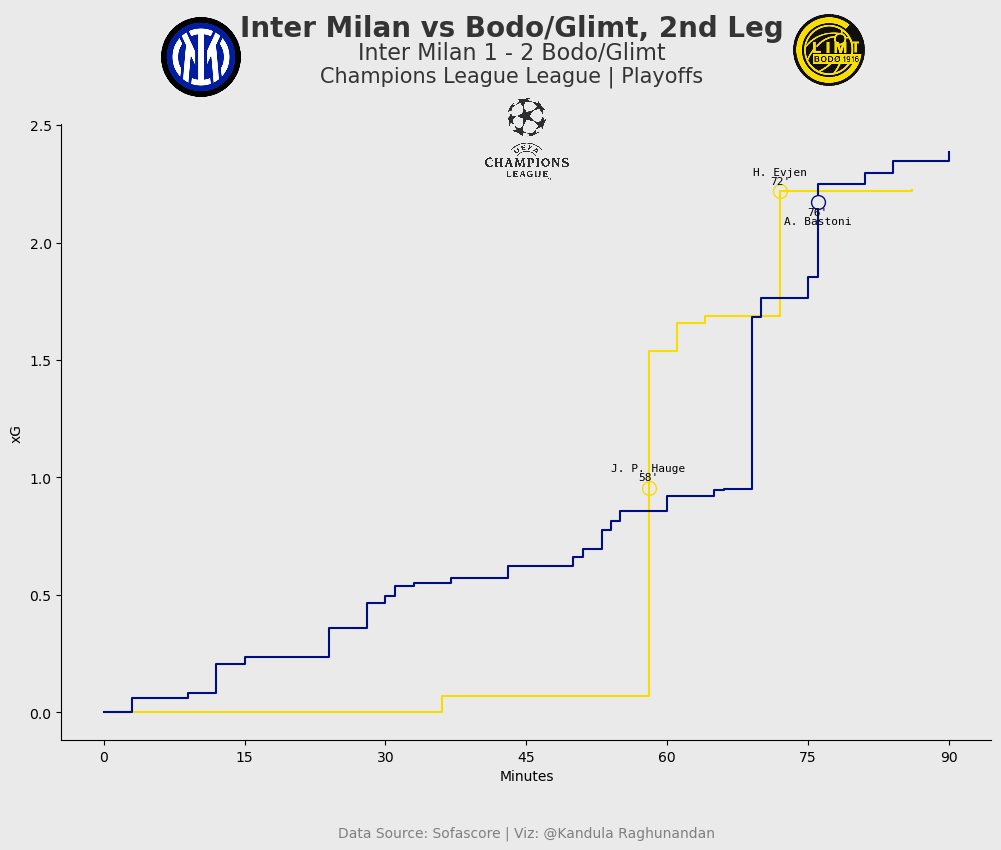

In [55]:
fig,ax=plt.subplots(figsize=(12,8))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df2['cumulative_xG'] = df2.groupby('isHome')['xg'].cumsum()

ax.step(x=a_min,y=a_cum,where="post",color="#F9DD00")
ax.step(x=h_min,y=h_cum,where="post",color="#010E80")

for x in range(len(df2["playerCoordinates.x"])):
    if (df2["isHome"][x]==True):
        if df2["shotType"][x]=="goal":
            plt.scatter(y=df2["cumulative_xG"][x],x=df2["time"][x],color="#EAEAEA",s=100,edgecolors="#010E80",zorder=5)
            ax.text(
                df2['time'][x],
                df2['cumulative_xG'][x] - 0.08,
                df2['player.shortName'][x],
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
            ax.text(
                df2['time'][x],
                df2['cumulative_xG'][x] - 0.045,
                str(df2['time'][x])+"'",
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
    if (df2["isHome"][x]==False):
        if df2["shotType"][x]=="goal":
            plt.scatter(y=df2["cumulative_xG"][x],x=df2["time"][x],color="#EAEAEA",s=100,edgecolors="#F9DD00")
            ax.text(
                df2['time'][x],
                df2['cumulative_xG'][x] + 0.08,
                df2['player.shortName'][x],
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )
            ax.text(
                df2['time'][x],
                df2['cumulative_xG'][x] + 0.045,
                str(df2['time'][x])+"'",
                ha='center',
                va='center',
                fontfamily='monospace',
                fontsize=8,
                zorder=10
            )

fig.text(0.5, 1, "Inter Milan vs Bodo/Glimt, 2nd Leg", fontsize=20, fontweight='bold', color='#343434', ha="center", va="center")
fig.text(0.5, 0.97, "Inter Milan 1 - 2 Bodo/Glimt", fontsize=16, color='#343434', ha="center", va="center")
fig.text(0.5, 0.94, "Champions League League | Playoffs", fontsize=15, color='#343434', ha="center", va="center" )

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Inter.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/Bodoe Glimt.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/UCL 25-26/UCL Logo1.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.225, xy=(0.15, 1.11))
add_logo(ax, away_logo, zoom=0.2, xy=(0.825, 1.12))
add_logo(ax, league_logo, zoom=0.03, xy=(.5, 0.975))

plt.text(
    0.5, -0.15, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

fig.savefig("C:/Users/K Raghunandan/Analyst/Results/Bodo_vs_inter_2_2026_xG.png", bbox_inches='tight')